### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [37]:
import pandas as pd
mc_df = pd.read_csv('/content/marketing_campaign.csv', sep="\t")
mc_df.info(), mc_df["Income"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(None,
 count      2216.000000
 mean      52247.251354
 std       25173.076661
 min        1730.000000
 25%       35303.000000
 50%       51381.500000
 75%       68522.000000
 max      666666.000000
 Name: Income, dtype: float64)

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [38]:
missing_income_df = mc_df[mc_df["Income"].isna()]
missing_income_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [39]:
# заповнюємо пропущенні значення по доходам медіанними значеннями враховуючи ступінь освіти
missing_indices = mc_df[mc_df["Income"].isna()].index
mc_df["Income"] = mc_df.groupby("Education")["Income"].transform(lambda x: x.fillna(x.median()))
mc_df.loc[missing_indices]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,52028.5,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,52028.5,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,55212.0,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,52028.5,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,52028.5,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,46805.0,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,55212.0,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,52028.5,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,50943.0,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,55212.0,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [40]:
# cat_columns = mc_df.select_dtypes(include=["object"]).columns

for col in ["Education", "Marital_Status"]:
    print(f"Unique values '{col}':")
    print(mc_df[col].unique())
    print("-" * 40)

Unique values 'Education':
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
----------------------------------------
Unique values 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
----------------------------------------


In [41]:
for col in ["Education", "Marital_Status"]:
    print(f"Count values'{col}':")
    print(mc_df[col].value_counts())
    print("-" * 40)

Count values'Education':
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
----------------------------------------
Count values'Marital_Status':
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
----------------------------------------


In [42]:
# замінимо Alone", "Absurd", "YOLO на Single
mc_df["Marital_Status"] = mc_df["Marital_Status"].replace(["Alone", "Absurd", "YOLO"], "Single")

In [43]:
for col in ["Education", "Marital_Status"]:
    print(f"Unique values '{col}':")
    print(mc_df[col].unique())
    print("-" * 40)

Unique values 'Education':
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
----------------------------------------
Unique values 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow']
----------------------------------------


In [44]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Кодуємо колонку 'Education' (Ordinal Encoding, бо є порядок)
education_order = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']  # Задаємо порядок категорій
ordinal_encoder = OrdinalEncoder(categories=[education_order])
mc_df["Education"] = ordinal_encoder.fit_transform(mc_df[["Education"]])

# 2. One-Hot Encoding для 'Marital_Status'
mc_df = pd.get_dummies(mc_df, columns=["Marital_Status"], drop_first=True, dtype=int)

In [45]:
mc_df


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,1.0,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,3,11,1,0,1,0,0
1,2174,1954,1.0,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,3,11,0,0,1,0,0
2,4141,1965,1.0,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,3,11,0,0,0,1,0
3,6182,1984,1.0,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,3,11,0,0,0,1,0
4,5324,1981,4.0,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,3,11,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1.0,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,3,11,0,1,0,0,0
2236,4001,1946,4.0,64014.0,2,1,10-06-2014,56,406,0,...,1,0,0,3,11,0,0,0,1,0
2237,7270,1981,1.0,56981.0,0,0,25-01-2014,91,908,48,...,0,0,0,3,11,0,0,0,0,0
2238,8235,1956,2.0,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,3,11,0,0,0,1,0


In [46]:
mc_df["Dt_Customer"] = pd.to_datetime(mc_df["Dt_Customer"], format="%d-%m-%Y")

mc_df["Days_Since_Registration"] = (pd.to_datetime("today") - mc_df["Dt_Customer"]).dt.days

print(mc_df[["Dt_Customer", "Days_Since_Registration"]])

     Dt_Customer  Days_Since_Registration
0     2012-09-04                     4593
1     2014-03-08                     4043
2     2013-08-21                     4242
3     2014-02-10                     4069
4     2014-01-19                     4091
...          ...                      ...
2235  2013-06-13                     4311
2236  2014-06-10                     3949
2237  2014-01-25                     4085
2238  2014-01-24                     4086
2239  2012-10-15                     4552

[2240 rows x 2 columns]


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics


X = mc_df.drop(columns=["ID", "Dt_Customer"])
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.4f}')

Silhouette Coefficient for the data Dataset Clusters: 0.5988


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [48]:
import plotly.express as px

fig = px.scatter_3d(X, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=labels, title="3D Scatter Plot of Clusters",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()

Загалом бачимо, що кластери розділились в залежності від доходу, що доволі логічно, проте є викид, який може спотворювати результати, бо викид віднесли в окремий кластер, а всі інші дані роздилили на 2 кластери.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
scaled_labels = kmeans_scaled.fit_predict(scaled_X)

s_scaled = metrics.silhouette_score(scaled_X, scaled_labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_scaled:.4f}')

Silhouette Coefficient for the data Dataset Clusters: 0.2359


Результати стали набагато гірші.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [50]:
income_desc = mc_df["Income"].describe()

Q1 = income_desc["25%"]
Q3 = income_desc["75%"]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Кількість рядків до очищення: {mc_df.shape[0]}")

mc_df = mc_df[(mc_df["Income"] >= lower_bound) & (mc_df["Income"] <= upper_bound)]

print(f"Кількість рядків після очищення: {mc_df.shape[0]}")

print(mc_df["Income"].describe())


Кількість рядків до очищення: 2240
Кількість рядків після очищення: 2232
count      2232.000000
mean      51635.562948
std       20603.164976
min        1730.000000
25%       35434.750000
50%       51381.500000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64


In [51]:
num_wp_desc = mc_df.NumWebPurchases.describe()
Q1 = num_wp_desc["25%"]
Q3 = num_wp_desc["75%"]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Кількість рядків до очищення: {mc_df.shape[0]}")

mc_df = mc_df[(mc_df.NumWebPurchases >= lower_bound) & (mc_df.NumWebPurchases <= upper_bound)]

print(f"Кількість рядків після очищення: {mc_df.shape[0]}")

print(mc_df.NumWebPurchases.describe())

Кількість рядків до очищення: 2232
Кількість рядків після очищення: 2228
count    2228.000000
mean        4.059246
std         2.623696
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        11.000000
Name: NumWebPurchases, dtype: float64


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

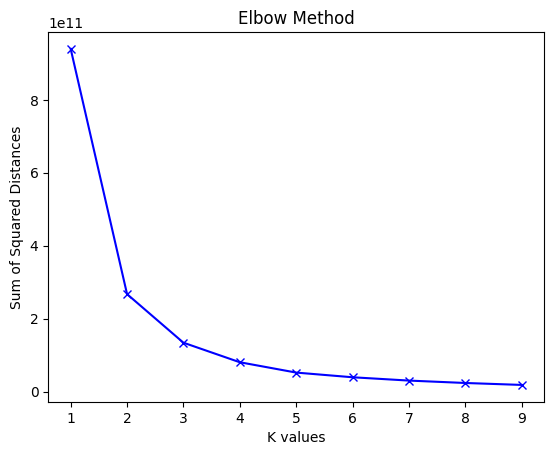

In [52]:
import matplotlib.pyplot as plt

K = range(1,10)
sum_of_squared_distances = []
X_cleaned = mc_df.drop(columns=["ID", "Dt_Customer"])
for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_cleaned)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_cleaned)

s = metrics.silhouette_score(X_cleaned, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.4f}')

fig = px.scatter_3d(X_cleaned, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=labels, title="3D Scatter Plot of Clusters",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()

Silhouette Coefficient for the data Dataset Clusters: 0.5520


Результат метрики силуету трохи гірший, ніж у самої першої моделі. Загалом тут доволі чітке розділення, бачимо, що в першу чергу воно відбувається на основі доходу

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

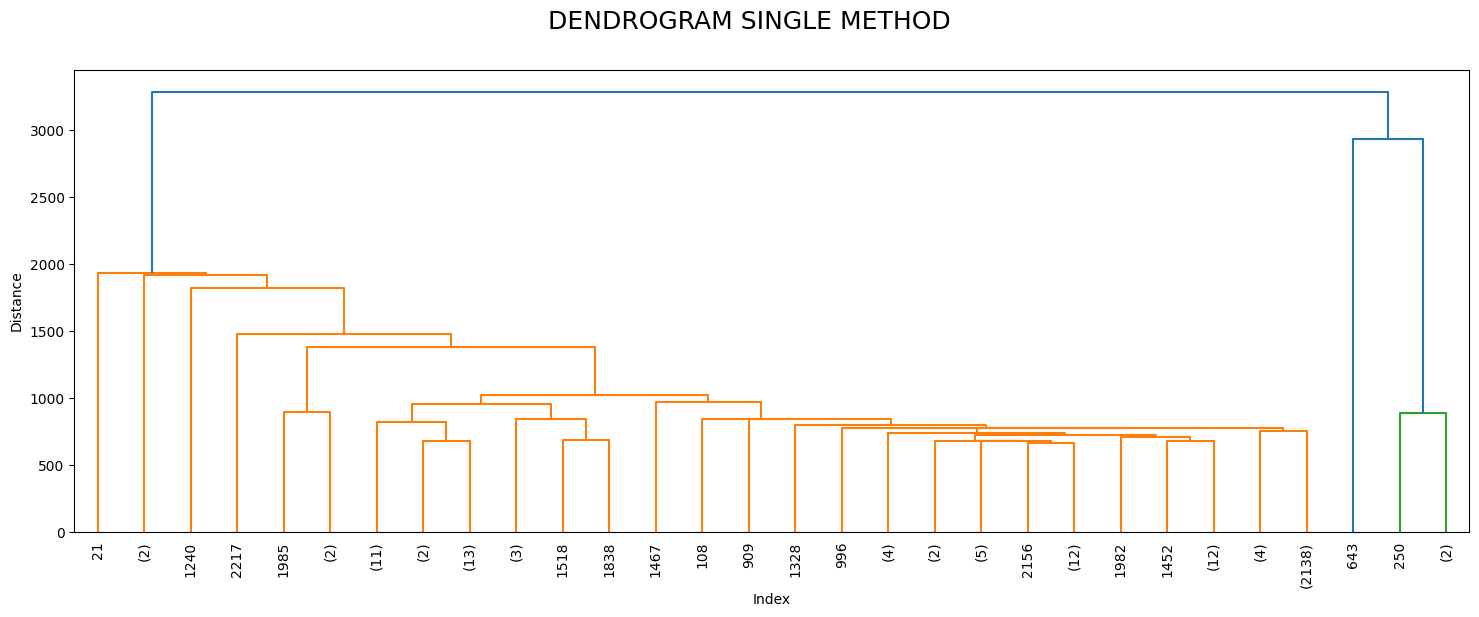

In [62]:
dist_sin = linkage(X_cleaned, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [63]:
clusters_2 = fcluster(dist_sin, t=2, criterion='maxclust')
clusters_3 = fcluster(dist_sin, t=3, criterion='maxclust')

silhouette_2 = silhouette_score(X_cleaned, clusters_2, metric='euclidean')
silhouette_3 = silhouette_score(X_cleaned, clusters_3, metric='euclidean')

print(f"Silhouette Score for 2 clusters: {silhouette_2:.4f}")
print(f"Silhouette Score for 3 clusters: {silhouette_3:.4f}")


Silhouette Score for 2 clusters: 0.4512
Silhouette Score for 3 clusters: 0.4406


In [64]:
fig = px.scatter_3d(X_cleaned, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=clusters_2, title="3D Scatter Plot of Clusters 2",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()

fig = px.scatter_3d(X_cleaned, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=clusters_3, title="3D Scatter Plot of Clusters 3",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()

Бачимо доволі дивне розбиття на класи, є один явно домінуючий, а інші мають всього декілька екземплярів. Розділення відбулось доволі погано. З таким розподілом даних краще використовувати ward linkage.

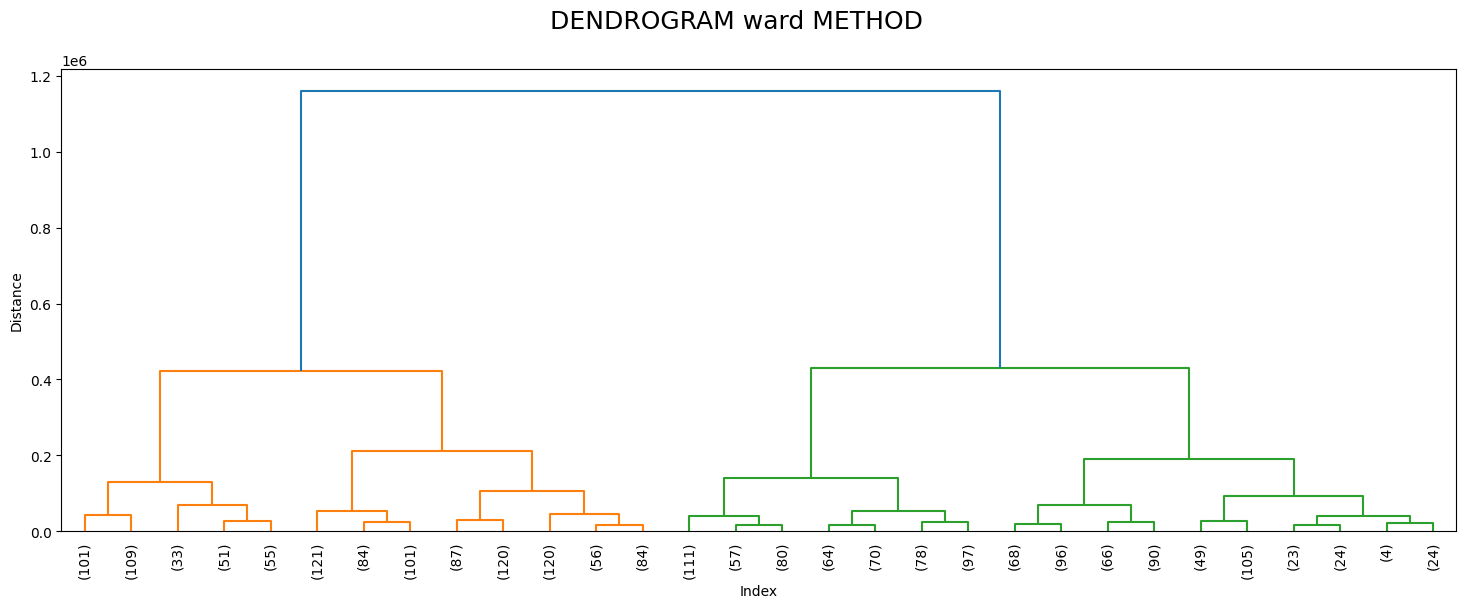

Silhouette Score for 2 clusters: 0.6042
Silhouette Score for 3 clusters: 0.5034


In [65]:
dist_sin = linkage(X_cleaned, method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM ward METHOD",fontsize=18)
plt.show()

clusters_2 = fcluster(dist_sin, t=2, criterion='maxclust')
clusters_3 = fcluster(dist_sin, t=3, criterion='maxclust')

silhouette_2 = silhouette_score(X_cleaned, clusters_2, metric='euclidean')
silhouette_3 = silhouette_score(X_cleaned, clusters_3, metric='euclidean')

print(f"Silhouette Score for 2 clusters: {silhouette_2:.4f}")
print(f"Silhouette Score for 3 clusters: {silhouette_3:.4f}")

fig = px.scatter_3d(X_cleaned, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=clusters_2, title="3D Scatter Plot of Clusters 2",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()

fig = px.scatter_3d(X_cleaned, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=clusters_3, title="3D Scatter Plot of Clusters 3",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()



Ward linkage з двома кластерами показала найкращий результат.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [18]:
!pip install scikit-learn-extra --no-cache-dir

In [ ]:
import os
os._exit(00)
!pip install numpy==1.26.4


In [70]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

kmedoids = KMedoids(n_clusters=2, random_state=42)

labels = kmedoids.fit_predict(X_cleaned)

s = silhouette_score(X_cleaned, labels, metric='euclidean')
print(f'Silhouette Coefficient for KMedoids: {s:.4f}')

fig = px.scatter_3d(X_cleaned, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=labels, title="3D Scatter Plot of K median",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()


Silhouette Coefficient for KMedoids: 0.6043


Кмедіан теж показує хорощі результати.

In [80]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=3)
dbscan.fit(X_cleaned)
labels = dbscan.labels_

print(labels)
s = silhouette_score(X_cleaned, labels, metric='euclidean')
print(f'Silhouette Coefficient for DBSCAN: {s:.4f}')

fig = px.scatter_3d(X_cleaned, x="Income", y="NumDealsPurchases", z="NumWebPurchases", color=labels, title="3D Scatter Plot of K median",
                    labels={"Income": "Income", "NumPurchases": "Number of Purchases", "NumWebPurchases": "NumWebPurchases"},
                    color_continuous_scale="Viridis")
fig.show()

[-1 -1 -1 ... -1 -1 -1]
Silhouette Coefficient for KMedoids: -0.7523


DBSCAN знаходить лише один клас

Загалом можливо саме цей набір даних доволі важко розподілити на кластери, бо ми спостерігаємо значне скупчення даних, візуально важко виділити конкретні кластери. Якщо розбивати дані на декілька кластерів, то бачимо, шо рівень доходу суттєво впливає на результати. І виходить, що ми отримуємо два чи три кластери з меншим та більшим і низьким, середнім та високим доходом відповідно.

Загалом така розбивка може бути корисною для прогнозування подальших продажів, можна окремо проаналізувати всі отримані кластери та зробити висновки, щодо пріорітетних товарів та сум витрат по ним.